# Libraries

In [1]:
#Import des libraires 

import numpy as np
import pandas as pd
from datetime import datetime

#Plots
import plotly.express as px
import matplotlib.pyplot as plt

# Nuage de mot 
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

C:\Users\MIKED\AppData\Local\Temp\ipykernel_13280\323439476.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data Access
Nous accèdons aux données qui se composent de Fake (fausses) et True (vraies). Nous allons les séparées en fake et true dataset.

In [2]:
fake_df=pd.read_csv("data/Fake.csv")
fake_df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [3]:
true_df=pd.read_csv("data/True.csv")
true_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [4]:
validation_df=pd.read_csv("data/validation_data.csv")
validation_df.head()

Unnamed: 0                                               text  isFake
0           0  Daniel Greenfield, a Shillman Journalism Fello...   False
1           1  Google Pinterest Digg Linkedin Reddit Stumbleu...   False
2           2  U.S. Secretary of State John F. Kerry said Mon...    True
3           3  — Kaydee King (@KaydeeKing) November 9, 2016 T...   False
4           4  It's primary day in New York and front-runners...    True

# Data cleaning
Dans ce dataframe nous analysons si les données sont propres (si elles contiennet des Nan Values, si le type des variables est approprié est approprié. Dans un premier temps nous allons créer un dataframe globale qui contient l'intégralité des données et on va créer une colonne "IsFake" qui contient "True" ou "False" pour classifier les données.


**Des Informations generales**



In [5]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [6]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   text        6335 non-null   object
 2   isFake      6335 non-null   bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 105.3+ KB


In [8]:
fake_df.shape 

(23481, 4)

In [9]:
true_df.shape

(21417, 4)

**Les datasets true et fake ont à peu près la même taille**

**Ni fake ni true ni valid n'a de données nulles**

## Etude de l'équilibrage des données
Nous alons observer si il existe un équilibre dans les données.

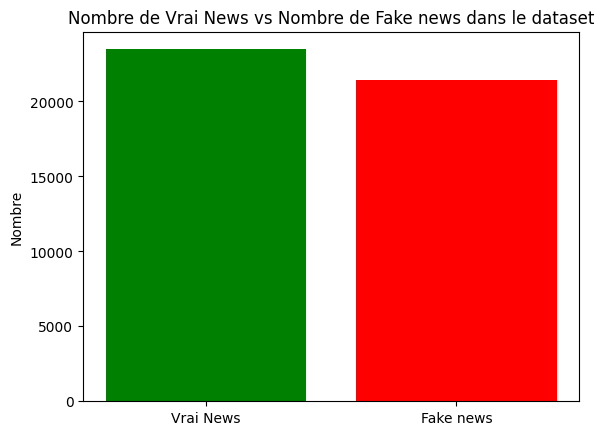

On peut observer un nombre assez équilibrer de notre modèle de 47.7% des données sont fake et 52.3% sont vrai. Ce qui peut nous motiver à enlever des données Fake, afin d'avoir un parfait équilibre entre les deux catégories. Nous allons donc enlever des données du dataset Fake.


In [10]:
#Comparer les tailles de Fake et True permet de savoir si les données sont bien équilibrées (bien distribuées)
fake_value_count=fake_df.shape[0]
true_value_count=true_df.shape[0]
total_news_number= fake_value_count+true_value_count

#donner les valeurs en pourcentage
percentage_true_news=true_value_count/total_news_number
percentage_fake_news=fake_value_count/total_news_number

isFake_counts = {'False': fake_value_count, 'True': true_value_count}  

# Affichage du diagramme pour plus de visibilité 
fig, ax = plt.subplots()
ax.bar(isFake_counts.keys(), isFake_counts.values(), color=['green', 'red'])

ax.set_ylabel('Nombre')
ax.set_title('Nombre de Vrai News vs Nombre de Fake news dans le dataset')
ax.set_xticks(list(isFake_counts.keys()))
ax.set_xticklabels(['Vrai News', 'Fake news'])

plt.show()
print(f"On peut observer un nombre assez équilibrer de notre modèle de {round(percentage_true_news*100,2)}% des données sont fake et {round(percentage_fake_news*100,2)}% sont vrai. Ce qui peut nous motiver à enlever des données Fake, afin d'avoir un parfait équilibre entre les deux catégories. Nous allons donc enlever des données du dataset Fake.")

**Etudier l'équilibrage au sens des thèmes abordés**

Pour assurer un bon équilibrage il ne faut pas seulement se fier aux nombres mais aussi voir si le dataset Fake traite à peu près des mêmes sujets que le dataset True car dans le cas contraire, l'IA pourrait se baser sur le sens pour décider de la justesse de l'information.

Exemple: Si le dataset fake parle plus de trump et le dataset True parle plus de la crise sanitaire celà pourrait biaiser la justesse de l'IA. 
Dès qu'elle aura une information sur Donald Trum elle aura tendance à Pré-classer l'information en tant que Fake News/même Deep Fake, de la même manière elle aura tendance à classer les informations sur la crise sanitaire comme vraies car c'est le sujet qui se rapproche le plus des données True.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MIKED\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


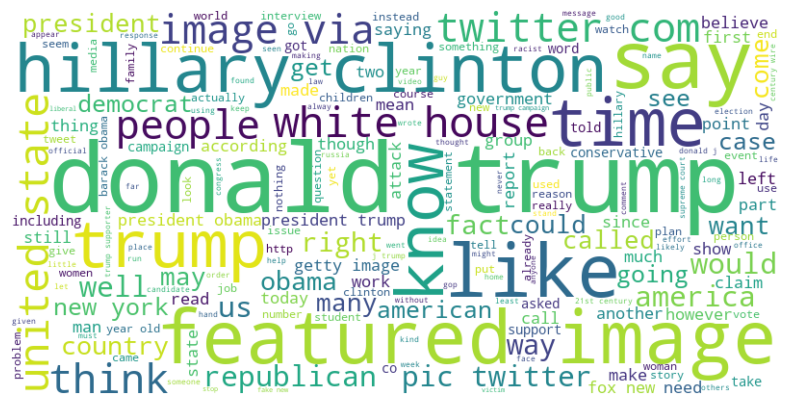

In [11]:
nltk.download('stopwords')

# Charger la liste des stopwords en anglais
stopwords_en = set(stopwords.words('english'))

# Ajouter des mots personnalisés à la liste des stopwords
custom_stopwords = ["said", "ones", "will","one","even","also","u"]
stopwords_en.update(custom_stopwords)

# Concaténer toutes les valeurs de la colonne "text" en excluant les stopwords
text_fake = ' '.join([word.lower() for sentence in fake_df["text"].astype(str) for word in sentence.split() if word.lower() not in stopwords_en])

# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_en).generate(text_fake)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MIKED\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


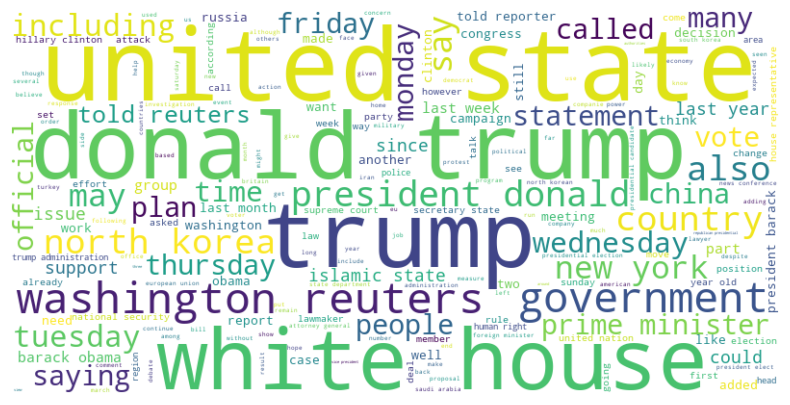

In [12]:
# De même pour les données réelles (True)
nltk.download('stopwords')

# Charger la liste des stopwords en anglais
stopwords_en = set(stopwords.words('english'))

# Ajouter des mots personnalisés à la liste des stopwords
custom_stopwords = ["said", "ones", "will","one","even","u"]
stopwords_en.update(custom_stopwords)

# Concaténer toutes les valeurs de la colonne "text" en excluant les stopwords
text_true = ' '.join([word.lower() for sentence in true_df["text"].astype(str) for word in sentence.split() if word.lower() not in stopwords_en])

# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_en).generate(text_true)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

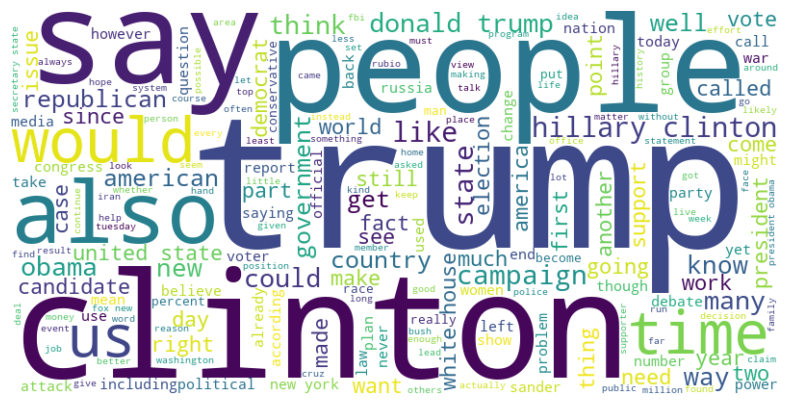

In [13]:
# De même pour les données Validation (Valid)

# Charger la liste des stopwords en anglais
stopwords_en = set(stopwords.words('english'))

# Ajouter des mots personnalisés à la liste des stopwords
custom_stopwords = ["said", "ones", "will","one","even","u","may"]
stopwords_en.update(custom_stopwords)

# Concaténer toutes les valeurs de la colonne "text" en excluant les stopwords
text_valid = ' '.join([word.lower() for sentence in validation_df["text"].astype(str) for word in sentence.split() if word.lower() not in stopwords_en])

# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_en).generate(text_valid)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**On remarque que dans les 3 datasets Donald Trump est la star! c'est bon signe pour la distribution des données qui ont l'air d'être homogènes pour les mots secondaires** 

In [14]:
# prendre un echantillon 
fake_df= fake_df.sample(n=len(true_df),random_state=42)

In [15]:
# On ajoute à chaque dataframe la colonne "isFake"
fake_df["isFake"]=True
fake_df.head(1)

title text   subject  \
13474  ABOUT HILLARY’S COUGH: We Discovered The Secre...       politics   

               date  isFake  
13474  Jul 20, 2016    True

In [16]:
true_df["isFake"]=False
true_df.head(1)

title  \
0  As U.S. budget fight looms, Republicans flip t...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   

                 date  isFake  
0  December 31, 2017    False

**Concatener le fake et le True dans un seul dataframe df**

In [17]:
df=pd.concat([fake_df,true_df])
df=df.reset_index().drop(['index'],axis=1) #on reset l'index de notre dataset.

In [18]:
df.isFake.unique()

array([ True, False])

In [19]:
#nous allons maintenant adapter les types de données
# Dans quelle format sont les données ?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42834 entries, 0 to 42833
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    42834 non-null  object
 1   text     42834 non-null  object
 2   subject  42834 non-null  object
 3   date     42834 non-null  object
 4   isFake   42834 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 1.3+ MB


In [20]:
#Nous allons convertir la colonne "date" en format datetime
df['date'] = df['date'].str.replace('January', 'Jan')
df['date'] = df['date'].str.replace('February', 'Feb')
df['date'] = df['date'].str.replace('March', 'Mar')
df['date'] = df['date'].str.replace('April', 'Apr')
df['date'] = df['date'].str.replace('May', 'May')
df['date'] = df['date'].str.replace('June', 'Jun')
df['date'] = df['date'].str.replace('July', 'Jul')
df['date'] = df['date'].str.replace('August', 'Aug')
df['date'] = df['date'].str.replace('September', 'Sep')
df['date'] = df['date'].str.replace('October', 'Oct')
df['date'] = df['date'].str.replace('November', 'Nov')
df['date'] = df['date'].str.replace('December', 'Dec')

In [21]:
# changer "date" en datetime
unique_dates = df['date'].unique()

invalid_format_dates = []
for date in unique_dates:
    try:
        pd.to_datetime(date.strip(), format='mixed') # on utilise le format 'mixed' pour gérer les dates avec des mois abrégés (ex: 'Jan', 'Feb', 'Mar', etc.)
    except ValueError as e:
        print(f"Error for date '{date}': {e}")
        invalid_format_dates.append(date)

print("Dates invalides:", invalid_format_dates)

Error for date 'MSNBC HOST Rudely Assumes Steel Worker Would Never Let His Son Follow in His Footsteps…He Couldn’t Be More Wrong [Video]': Unknown datetime string format, unable to parse: MSNBC HOST Rudely Assumes Steel Worker Would Never Let His Son Follow in His Footsteps…He Couldn’t Be More Wrong [Video], at position 0
Error for date 'https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg': Unknown datetime string format, unable to parse: https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg, at position 0
Error for date 'https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/': Unknown datetime string format, unable to parse: https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/, at position 0
Error for date 'https://fedup.wpengine.com/wp-content/uploads/2015/04/

Nous pouvons voir que les données ne sont toutes du meme format, il va falloire changer cela. Nous pouvons identifier 3 formats qui ne respectent pas la forme suivante "Mois :
- 'd-MMM-yy' (comme '19-Feb-18')
- 'MMM d, yyyy' (comme 'Dec 31, 2017').
- "des URL de site" 

Concernant les URL nous allons éliminer ces lignes du dataset. Pour les autres valeurs nous allons concevoir un algorithme pour les transformer dans un dataframe convenable.

In [22]:
# filtrer et supprimer les URL, pour simplifier nous allons dire que si 
#la ligne contient le suit pas les formats 'd-MMM-yy' ou 'MMM d, yyyy'  
#alors on supprime la ligne.
df = df[~df['date'].isin(invalid_format_dates)]
df['date'] = pd.to_datetime(df['date'], format='mixed')

In [23]:
#print the dates of the dataframe who have isFake as False
df[df['isFake']==False]['date']

21417   2017-12-31
21418   2017-12-29
21419   2017-12-31
21420   2017-12-30
21421   2017-12-29
           ...    
42829   2017-08-22
42830   2017-08-22
42831   2017-08-22
42832   2017-08-22
42833   2017-08-22
Name: date, Length: 21417, dtype: datetime64[ns]

nous avons donc modifié les formats des dates de D-M-Y.
dates_numpy_array

In [24]:
df.isFake.unique()

array([ True, False])

In [25]:
#nous verifions si il y a des valeurs manquantes dans les dates
df['date'].isnull().sum()

0

Nous avons prouvé que il existe des pas values, donc nous allons eliminer les lignes.

Nous avons donc néttoyé la colonne date. Nous verifions les autres colonnes.

In [26]:
df.columns

Index(['title', 'text', 'subject', 'date', 'isFake'], dtype='object')

In [27]:
df.title.isnull().sum()

0

In [28]:
df.text.isnull().sum()

0

In [29]:
df.subject.isnull().sum()

0

Notre dataset est près à l'emplois.

# Data analysis + Visualisation
Nous avons plusieurs points à analyser avant de créer notre model, voici les questions sur lesquelles nous nous focalisons pour répondre aux questions:
Types de "subject" dans le DataFrame :

**Analyse de les sujets les plus présents**
- Combien de catégories uniques de "subject" existent-elles ?
- Y a-t-il une distribution inégale des sujets entre les news fake et vraies ?

**Sujet avec le plus de fake news ou de vraies news**
- Y a-t-il des sujets spécifiques plus susceptibles d'être associés à des fake news ?

**Analyse de la longueur des textes :**
- Quelle est la distribution de la longueur des textes pour les fake news par rapport aux vraies news ?
- La longueur du texte est-elle un indicateur potentiel de fiabilité ?
Répétition des titres :

**Analyse des dates :**
- Quelles sont les dates minimales et maximales ? Y a-t-il des tendances temporelles dans les fake news ?
- Y a-t-il des périodes spécifiques où les fake news sont plus fréquentes ?

L'analyse va nous permettre des réponse à ces questions.

**Combien de catégories uniques de "subject" existent-elles ?**

In [30]:
print(f"Nous avons {len(df.subject.unique())} sujets différents")

Nous avons 8 sujets différents


**Y a-t-il une distribution inégale des sujets entre les news fake et vraies ?**

On observe déja le nombre de données Fake et true dans son ensemble:

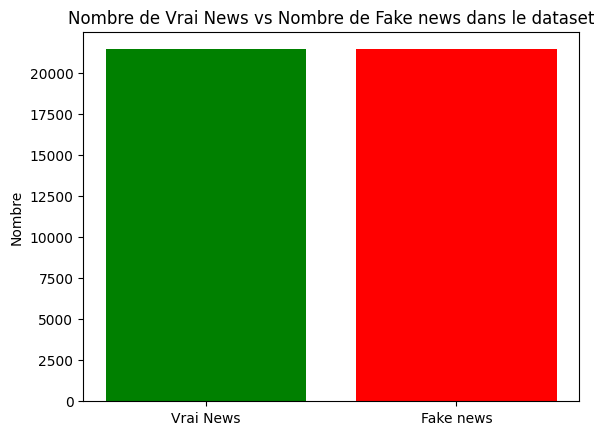

On peut observer un nombre assez équilibrer de notre modèle de 49.99% des données sont fake et 50.01% sont vrai. Ce qui peut nous motiver à enlever des données Fake, afin d'avoir un parfait équilibre entre les deux catégories.  


In [31]:
fake_value_count=df[df["isFake"]==False].shape[0]
true_value_count=df[df["isFake"]==True].shape[0]
total_news_number= fake_value_count+true_value_count

percentage_true_news=true_value_count/total_news_number
percentage_fake_news=fake_value_count/total_news_number

# Sample data
isFake_counts = {'False': fake_value_count, 'True': true_value_count}  # Assuming these are the counts

# Bar chart
fig, ax = plt.subplots()
ax.bar(isFake_counts.keys(), isFake_counts.values(), color=['green', 'red'])

ax.set_ylabel('Nombre')
ax.set_title('Nombre de Vrai News vs Nombre de Fake news dans le dataset')
ax.set_xticks(list(isFake_counts.keys()))
ax.set_xticklabels(['Vrai News', 'Fake news'])

plt.show()
print(f"On peut observer un nombre assez équilibrer de notre modèle de {round(percentage_true_news*100,2)}% des données sont fake et {round(percentage_fake_news*100,2)}% sont vrai. Ce qui peut nous motiver à enlever des données Fake, afin d'avoir un parfait équilibre entre les deux catégories.  ")

In [32]:
df.groupby('subject')['isFake'].value_counts()

subject          isFake
Government News  True       1431
Middle-east      True        702
News             True       8241
US_News          True        708
left-news        True       4072
politics         True       6255
politicsNews     False     11272
worldnews        False     10145
Name: count, dtype: int64

In [33]:
# Grouper par 'subject' et compter les occurrences de True et False dans 'isFake'
count_by_subject = df.groupby('subject')['isFake'].value_counts().unstack().fillna(0)

# Afficher le résultat
print(count_by_subject)

isFake             False   True 
subject                         
Government News      0.0  1431.0
Middle-east          0.0   702.0
News                 0.0  8241.0
US_News              0.0   708.0
left-news            0.0  4072.0
politics             0.0  6255.0
politicsNews     11272.0     0.0
worldnews        10145.0     0.0


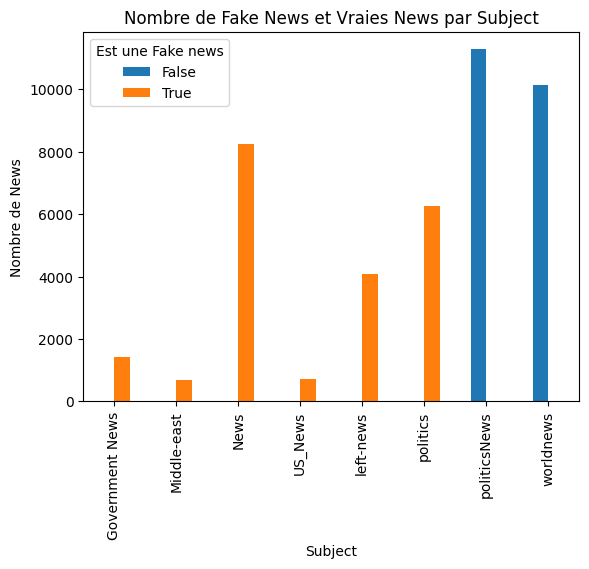

In [34]:
# Créer un graphique à barres empilées
count_by_subject.plot(kind='bar')

# Ajouter des titres et labels
plt.title('Nombre de Fake News et Vraies News par Subject')
plt.xlabel('Subject')
plt.ylabel('Nombre de News')

# Afficher la légende
plt.legend(title="Est une Fake news",loc="upper left")

# Afficher le graphique
plt.show()


La distribution des fake news et des true news est assez innégal si on les reproupe par subject, il es très probable qu'elle ne soit pas un bon estimateur pour détecter les fake news. 
Il serait envisageable:
- Soit utiliser des techniques comme SMOTE pour générer des nouvelles données de la classe minoritaire.
- soit enlever la colonne "subject" du dataset. (car à la fin, ce sont des news, peut importe d'où elles viennent.)

**Sujet avec le plus de fake news ou de vraies news**:
- PoliticsNews
- Worldnews

**Analyse de la longueur des Titres :**

In [35]:
#Quelle est la distribution de la longueur des titres pour les fake news par rapport aux vraies news ?
titles=df[['title','isFake']]
titles.head()

title  isFake
0  ABOUT HILLARY’S COUGH: We Discovered The Secre...    True
1  BREAKING: OBAMACARE REPEAL Clears First Hurdle...    True
2  ‘SLEEPY’ JUSTICE GINSBURG: Excites Crowd By Sa...    True
3   WATCH: Kellyanne Conway Very Upset Hillary Cl...    True
4   GOP Gives Trump The Middle Finger, Prepares T...    True

In [36]:
title_length=[]
for title in titles['title']:
    title_length.append(len(title))
titles['title length']=title_length

C:\Users\MIKED\AppData\Local\Temp\ipykernel_13280\2468875001.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles['title length']=title_length


In [37]:
#on détermine la moyenne de Fake et True
title_length=titles.drop(['title'],axis=1)
title_length

isFake  title length
0        True            81
1        True            62
2        True           104
3        True            76
4        True            72
...       ...           ...
42829   False            61
42830   False            52
42831   False            49
42832   False            61
42833   False            52

[42826 rows x 2 columns]

In [38]:
true_title_length=title_length[title_length['isFake']==True]
true_title_length.describe()

title length
count  21409.000000
mean      94.188752
std       27.219115
min       15.000000
25%       77.000000
50%       90.000000
75%      105.000000
max      286.000000

In [39]:
false_title_length=title_length[title_length['isFake']==False]
false_title_length.describe()

title length
count  21417.000000
mean      64.667881
std        9.168999
min       26.000000
25%       59.000000
50%       64.000000
75%       70.000000
max      133.000000

In [40]:
# Creating plot
fig=px.box(title_length,x='isFake',y='title length',points='all')
 
# show plot
fig.show()

- Les titres des vraies nouvelles ont une longueur moyenne significativement plus longue (94.2 mots) par rapport aux fausses nouvelles (64.7 mots).
- La variabilité (écart-type) dans les longueurs de titres des vraies nouvelles (27.2 mots) est plus grande que celle des fausses nouvelles (9.2 mots), indiquant une plus grande diversité dans la longueur des titres des vraies nouvelles.
- Les fausses nouvelles présentent une longueur de titre plus uniforme
- Les valeurs minimales et maximales montrent que les vraies news ont une plage plus large de longueur de titre.
- La distribution des quartiles montre que les titres de fausses nouvelles sont concentrés dans une plage plus étroite.

On peut conclure que c'est un indicateur potentiel pour la détection de fake news.

**Analyse de la longueur des Titres :**

In [41]:
#Quelle est la distribution de la longueur des titres pour les fake news par rapport aux vraies news ?
textes=df[['text','isFake']]
textes.head()

text  isFake
0                                                       True
1  The Senate voted 51-48 this afternoon to proce...    True
2  So much for the SCOTUS not being political Che...    True
3  White House counselor Kellyanne Conway crawled...    True
4  Donald Trump may have decided that Russia is g...    True

In [42]:
text_length=[]
for text in textes['text']:
    text_length.append(len(text))
textes['text length']=text_length
textes

C:\Users\MIKED\AppData\Local\Temp\ipykernel_13280\1693554252.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



text  isFake  text length
0                                                           True            1
1      The Senate voted 51-48 this afternoon to proce...    True         1283
2      So much for the SCOTUS not being political Che...    True          211
3      White House counselor Kellyanne Conway crawled...    True         2157
4      Donald Trump may have decided that Russia is g...    True         3243
...                                                  ...     ...          ...
42829  BRUSSELS (Reuters) - NATO allies on Tuesday we...   False         2821
42830  LONDON (Reuters) - LexisNexis, a provider of l...   False          800
42831  MINSK (Reuters) - In the shadow of disused Sov...   False         1950
42832  MOSCOW (Reuters) - Vatican Secretary of State ...   False         1199
42833  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...   False         1338

[42826 rows x 3 columns]

In [43]:
true_text_length=textes[textes['isFake']==True]
true_text_length.describe()

text length
count  21409.000000
mean    2543.436686
std     2509.093268
min        1.000000
25%     1433.000000
50%     2165.000000
75%     3026.000000
max    51794.000000

In [44]:
fake_text_length=textes[textes['isFake']==False]
fake_text_length.describe()

text length
count  21417.000000
mean    2383.278517
std     1684.835730
min        1.000000
25%      914.000000
50%     2222.000000
75%     3237.000000
max    29781.000000

In [45]:
# Creating plot
fig=px.box(textes,x='isFake',y='text length',points='all')
 
# show plot
fig.show()

- La moyenne des Fake (2383.278517) et des vrais (2548.422777) est sont très proches.
- la variablilité des vrai (2532.933638) news est supeiruer au faux (1684.835730) ceci peut aussi etre expliqué que le nombre de fake news est infeiruer au nombre de vrai news. Mais elle reste élevé dans les deux camps.
- Les quartils, le minimum et maximum, montrent que les vrai news ont une plus petite marge que les fake news. 

Il est important a noter que le nobre de vrai news est beaucoup plus élevé que le nombre de fake news, ceci peut influer  les valeurs. En revanche on peut partir du principe que la longieur du texte peut etre un bon indicateur pour la détection des fake news. (à utiliser avec prudence)

**Analyse des dates :**

In [46]:
df_sorted_by_date=df.sort_values(by='date')
df_sorted_by_date.head()

title  \
19990  WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...   
12283  BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...   
14827  FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...   
9619   HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...   
18274  APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...   

                                                    text   subject       date  \
19990  In case you missed it Sen. Harry Reid (R-NV), ...  politics 2015-03-31   
12283  Does anyone really think Hillary Clinton will ...  politics 2015-03-31   
14827  Just making room for Hillary President Obama t...  politics 2015-03-31   
9619   The irony here isn t lost on us. Hillary is be...  politics 2015-03-31   
18274  The gay mafia has a new corporate  Don. This i...  politics 2015-03-31   

       isFake  
19990    True  
12283    True  
14827    True  
9619     True  
18274    True

In [47]:
dates=df_sorted_by_date[['date','isFake']]
dates=pd.get_dummies(dates,columns=['isFake'],)
dates.head()

date  isFake_False  isFake_True
19990 2015-03-31         False         True
12283 2015-03-31         False         True
14827 2015-03-31         False         True
9619  2015-03-31         False         True
18274 2015-03-31         False         True

In [48]:
dates=dates.groupby(by='date').sum().rename(columns={'isFake_False':'Fake', 'isFake_True':'Real'})
dates

Fake  Real
date                  
2015-03-31     0     6
2015-04-01     0     2
2015-04-04     0     5
2015-04-05     0    12
2015-04-06     0    23
...          ...   ...
2018-02-15     0     6
2018-02-16     0     8
2018-02-17     0     6
2018-02-18     0     7
2018-02-19     0     3

[1009 rows x 2 columns]

In [49]:
#Quelles sont les dates minimales et maximales ? 
premiere_date=dates.index[0]
derniere_date=dates.index[-1]
premiere_date,derniere_date

(Timestamp('2015-03-31 00:00:00'), Timestamp('2018-02-19 00:00:00'))

On observe que le dataframe contient des données de **3 ans**, nous pouvons étudier si il existe des tendances temporelles dans les fake news.

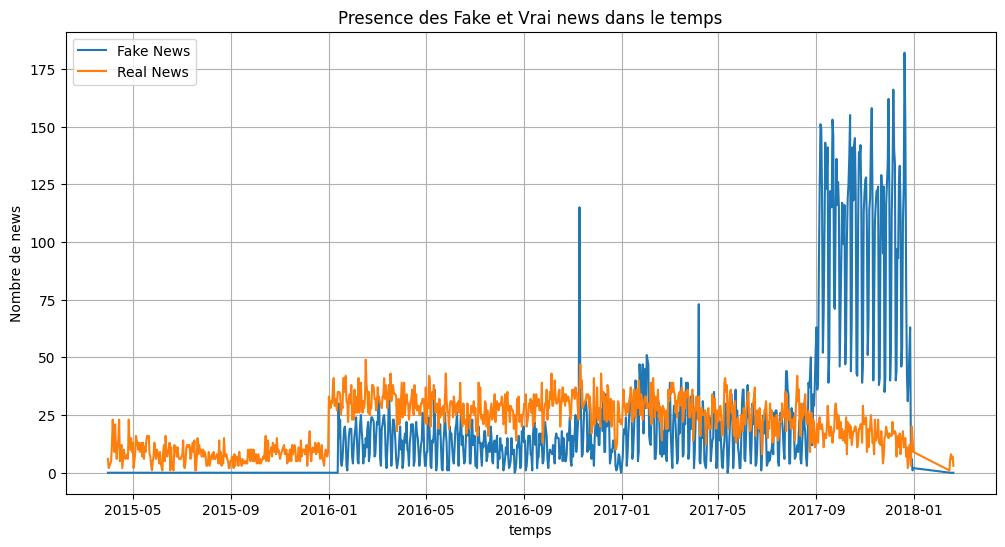

In [50]:
# Tracer les graphiques
plt.figure(figsize=(12, 6))
plt.plot(dates.index, dates['Fake'], label='Fake News')
plt.plot(dates.index, dates['Real'], label='Real News')
plt.title('Presence des Fake et Vrai news dans le temps')
plt.xlabel('temps')
plt.ylabel('Nombre de news')
plt.legend()
plt.grid(True)
plt.show()

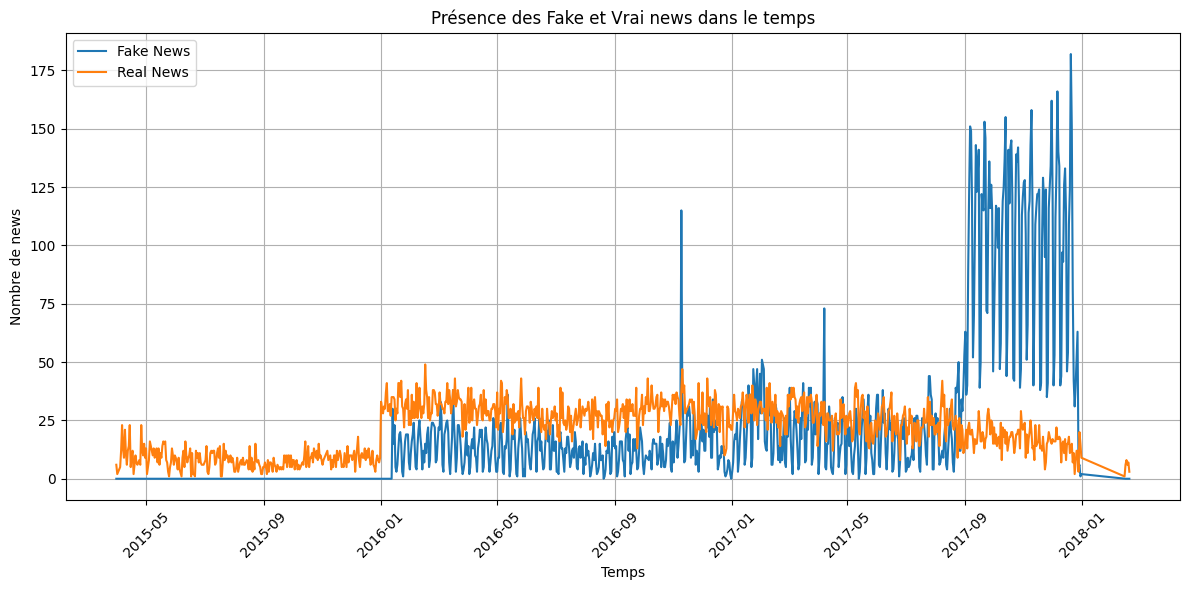

In [51]:
# Tracer les graphiques
plt.figure(figsize=(12, 6))
plt.plot(dates.index, dates['Fake'], label='Fake News')
plt.plot(dates.index, dates['Real'], label='Real News')
plt.title('Présence des Fake et Vrai news dans le temps')
plt.xlabel('Temps')
plt.ylabel('Nombre de news')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates sur l'axe x pour une meilleure lisibilité
plt.tight_layout()  # Ajuster la mise en page pour éviter que les étiquettes ne se chevauchent
plt.show()


On peut observer que de la date de départ du 2015-03-31 jusqu'a 2016-1-31 les vrai news sont plus présent, et les fake news sont inéxistants.
À partir de 2016, les fake news ont augmenté de manière conséquente, mais les vrai news rèstent dominant et constant, jusqu'a 2018. Les fake news, présente plus d'írrégularité de parution entre 2016 et 2018, la periode des fake news sur les vrai news attaint son sommet entre 2017-09-01 à 2018-01-01.

Si on devrais entrainer notre model, il serait potentiellemenet important de ne pas inclure la date, car il se peut que le model prédise la validité d'une news en fonction de sa periode de parution. (à confirmer)

In [52]:
#we get now a dataset only with the text, the title and the values to predict. 
data=df[['title','text','isFake']].sample(frac=1).reset_index(drop=True) #on mélange le dataset puis on le reset les index.
data.to_csv('title_text.csv')

# Lemmatization of text and title
We will employ a method called lemmatization, which processes words to return them to their original or root form.

For example, 'runs' and 'ran' would both be lemmatized to 'run.'

This simplifies the learning process for our machine learning model by reducing the complexity of language and standardizing word variations.

In [53]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()

# single word lemmatization examples
list1 = ['kites', 'babies', 'dogs', 'flying', 'smiling', 
		'driving', 'died', 'tried', 'feet']
for words in list1:
	print(words + " ---> " + wnl.lemmatize(words))

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\MIKED/nltk_data'
    - 'c:\\Users\\MIKED\\miniconda3\\nltk_data'
    - 'c:\\Users\\MIKED\\miniconda3\\share\\nltk_data'
    - 'c:\\Users\\MIKED\\miniconda3\\lib\\nltk_data'
    - 'C:\\Users\\MIKED\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
wnl.lemmatize('Speaks')

In [ ]:
string = 'the cat is sitting with the bats on the striped mat under many flying geese'
 
    
# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()
# Converting String into tokens
list2 = nltk.word_tokenize(string)
print(list2)
#> ['the', 'cat', 'is', 'sitting', 'with', 'the', 'bats', 'on',
#   'the', 'striped', 'mat', 'under', 'many', 'flying', 'geese']
 
lemmatized_string = ' '.join([wnl.lemmatize(words) for words in list2])
 
print(lemmatized_string)

**Ckean data de test (normalisation**)